<a href="https://colab.research.google.com/github/Arti1423/Registration_Form/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset from given data set
cancer_df = pd.read_csv('cancer.csv')

# Display the first few rows of the dataset
cancer_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Drop the unnecessary columns
cancer_df = cancer_df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

# Normalize the dataset using Min-Max scaling
cancer_normalized = (cancer_df - cancer_df.min()) / (cancer_df.max() - cancer_df.min())

cancer_normalized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [3]:
from scipy.spatial import distance_matrix

# Compute the distance matrix using Scipy
distance_matrix = distance_matrix(cancer_normalized, cancer_normalized)
distance_matrix


array([[0.        , 1.49982926, 0.95724027, ..., 1.73121202, 1.01357355,
        2.55303745],
       [1.49982926, 0.        , 0.75412489, ..., 0.74739839, 1.66897866,
        1.64474438],
       [0.95724027, 0.75412489, 0.        , ..., 0.94564569, 1.05278686,
        1.98474539],
       ...,
       [1.73121202, 0.74739839, 0.94564569, ..., 0.        , 1.63939692,
        1.25982562],
       [1.01357355, 1.66897866, 1.05278686, ..., 1.63939692, 0.        ,
        2.66200922],
       [2.55303745, 1.64474438, 1.98474539, ..., 1.25982562, 2.66200922,
        0.        ]])

In [6]:
import numpy as np
def single_linkage(cluster_1, cluster_2, distance_matrix):
    """
    Compute single linkage distance between two clusters.

    Parameters:
    - cluster_1: list of indices in the first cluster
    - cluster_2: list of indices in the second cluster
    - distance_matrix: array-like, pairwise distance matrix

    Returns:
    - distance: single linkage distance between the two clusters
    """
    distances = [distance_matrix[i][j] for i in cluster_1 for j in cluster_2]
    return min(distances)

def complete_linkage(cluster_1, cluster_2, distance_matrix):
    """
    Compute complete linkage distance between two clusters.

    Parameters:
    - cluster_1: list of indices in the first cluster
    - cluster_2: list of indices in the second cluster
    - distance_matrix: array-like, pairwise distance matrix

    Returns:
    - distance: complete linkage distance between the two clusters
    """
    distances = [distance_matrix[i][j] for i in cluster_1 for j in cluster_2]
    return max(distances)

def average_linkage(cluster_1, cluster_2, distance_matrix):
    """
    Compute average linkage distance between two clusters.

    Parameters:
    - cluster_1: list of indices in the first cluster
    - cluster_2: list of indices in the second cluster
    - distance_matrix: array-like, pairwise distance matrix

    Returns:
    - distance: average linkage distance between the two clusters
    """
    distances = [distance_matrix[i][j] for i in cluster_1 for j in cluster_2]
    return sum(distances) / len(distances)

def agglomerative_clustering(distance_matrix, linkage="single", n_clusters=2):
    """
    Perform hierarchical agglomerative clustering.

    Parameters:
    - distance_matrix: array-like, pairwise distance matrix
    - linkage: str, method of linkage {“single”, “complete”, “average”}
    - n_clusters: int, number of clusters to form

    Returns:
    - labels: array-like, cluster labels for each data point
    """
    # Start with each point as its own cluster
    clusters = [[i] for i in range(len(distance_matrix))]

    while len(clusters) > n_clusters:
        # Find the two clusters to merge based on the linkage criterion
        min_distance = float('inf')
        cluster_to_merge = (-1, -1)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if linkage == "single":
                    d = single_linkage(clusters[i], clusters[j], distance_matrix)
                elif linkage == "complete":
                    d = complete_linkage(clusters[i], clusters[j], distance_matrix)
                elif linkage == "average":
                    d = average_linkage(clusters[i], clusters[j], distance_matrix)
                else:
                    raise ValueError("Invalid linkage method")

                if d < min_distance:
                    min_distance = d
                    cluster_to_merge = (i, j)

        # Merge the identified clusters
        clusters[cluster_to_merge[0]].extend(clusters[cluster_to_merge[1]])
        del clusters[cluster_to_merge[1]]

    # Assign labels based on the formed clusters
    labels = np.zeros(len(distance_matrix), dtype=int)
    for idx, cluster in enumerate(clusters):
        for point_idx in cluster:
            labels[point_idx] = idx

    return labels

# Perform hierarchical agglomerative clustering using single linkage
labels_single = agglomerative_clustering(distance_matrix, linkage="single", n_clusters=2)
labels_single


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
# Perform hierarchical agglomerative clustering using complete and average linkages
labels_complete = agglomerative_clustering(distance_matrix, linkage="complete", n_clusters=2)
labels_average = agglomerative_clustering(distance_matrix, linkage="average", n_clusters=2)

labels_complete, labels_average

(array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

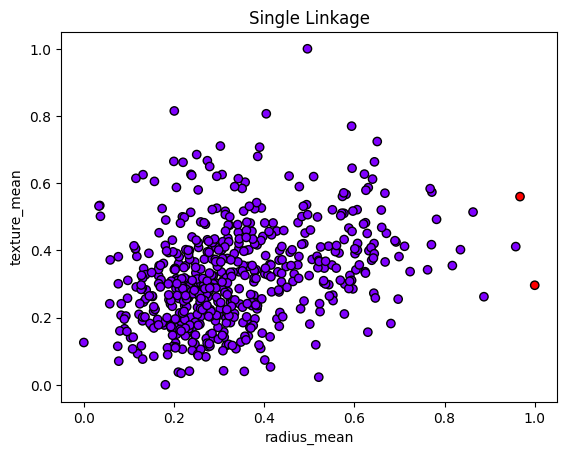

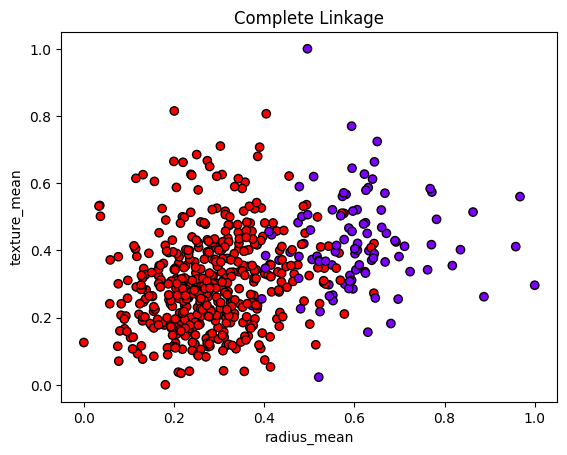

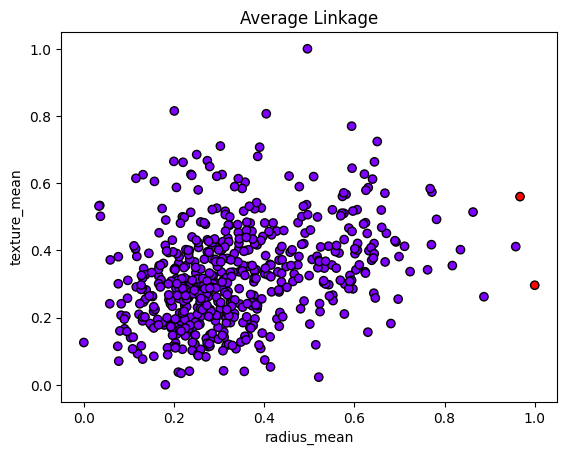

In [10]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, title):
    """
    Plot data points with different colors based on cluster labels.

    Parameters:
    - data: DataFrame or array-like, data points to plot
    - labels: array-like, cluster labels for each data point
    - title: str, title for the plot
    """
    plt.scatter(data['radius_mean'], data['texture_mean'], c=labels, cmap='rainbow', edgecolor='k')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.show()

# Plot the clusters for single and complete linkage methods
plot_clusters(cancer_normalized, labels_single, "Single Linkage")
plot_clusters(cancer_normalized, labels_complete, "Complete Linkage")
plot_clusters(cancer_normalized, labels_average, "Average Linkage")

In [13]:
def get_neighbors(point_idx, data, eps):
    """
    Get all points within eps of a given point.

    Parameters:
    - point_idx: int, index of the given point
    - data: DataFrame or array-like, dataset
    - eps: float, epsilon distance threshold

    Returns:
    - neighbors: list of int, indices of neighbor points within eps
    """
    return [idx for idx, value in enumerate(data) if np.linalg.norm(data[point_idx] - value) < eps]

def dbscan(data, eps, min_points):
    """
    Apply DBSCAN clustering algorithm.

    Parameters:
    - data: DataFrame or array-like, dataset
    - eps: float, epsilon distance threshold
    - min_points: int, minimum number of points to form a dense region

    Returns:
    - labels: array-like, cluster labels for each data point
    """
    labels = [-1] * len(data)  # Start with all points as outliers
    cluster_id = 0

    for point_idx in range(len(data)):
        # Skip if point is already classified
        if labels[point_idx] != -1:
            continue

        # Get neighbors of the point
        neighbors = get_neighbors(point_idx, data, eps)

        # Check for core points (points with enough neighbors)
        if len(neighbors) < min_points:
            continue

        # Assign the point to a new cluster and expand the cluster
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
                new_neighbors = get_neighbors(neighbor_idx, data, eps)
                if len(new_neighbors) >= min_points:
                    neighbors.extend(new_neighbors)
            i += 1

        cluster_id += 1

    return labels

# Apply DBSCAN clustering
labels_dbscan = dbscan(cancer_normalized.values, eps=0.2, min_points=6)
labels_dbscan
labels_dbscan1 = dbscan(cancer_normalized.values, eps=0.5, min_points=6)
labels_dbscan1
labels_dbscan2 = dbscan(cancer_normalized.values, eps=0.2, min_points=3)
labels_dbscan2


[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 6,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1

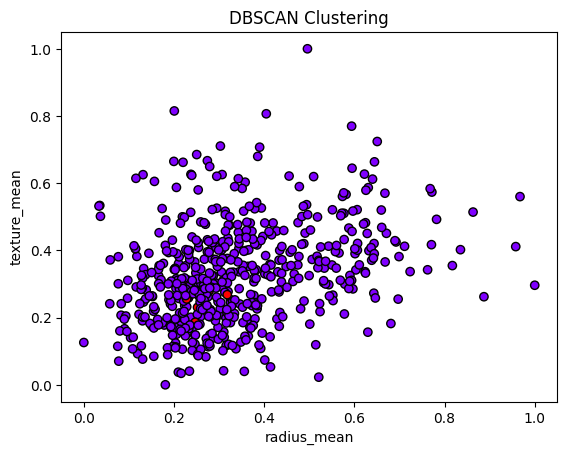

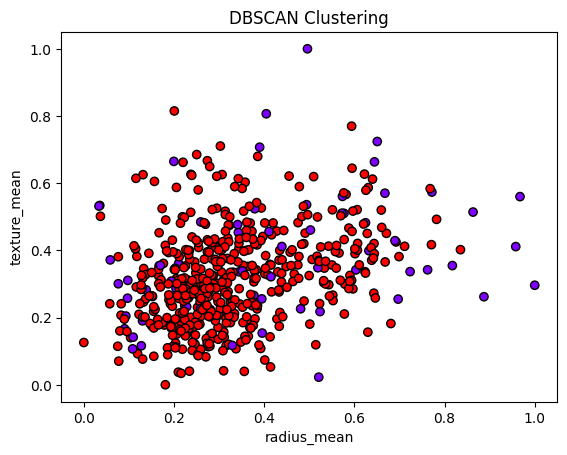

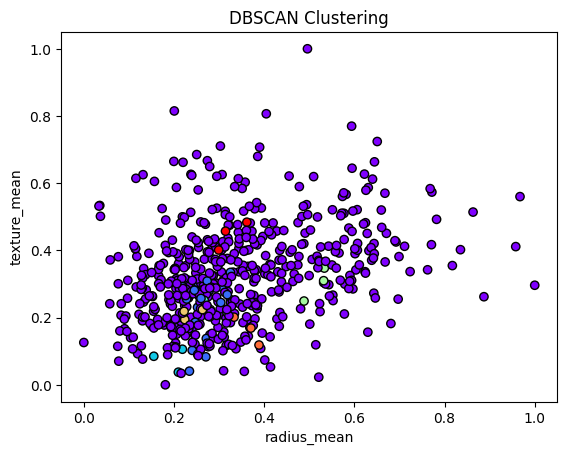

In [14]:
# Plot the clusters for DBSCAN
plot_clusters(cancer_normalized, labels_dbscan, "DBSCAN Clustering")
plot_clusters(cancer_normalized, labels_dbscan1, "DBSCAN Clustering")
plot_clusters(cancer_normalized, labels_dbscan2, "DBSCAN Clustering")